
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 85</p>
## <p style="text-align: center;">Due: Monday, September 14 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# <p style="text-align: center;">Homework 1: Joshua Artmann and Sujay Chebbi</p>
## <p style="text-align: center;">UTEID: jka753</p>
## <p style="text-align: center;">UTEID: sc64344</p>

# Question 1: Challenges in Data Science (10 pts)

#### Refer to the Domino guide under Modules --> Additional Resources

#### Section 2 describes 8 Challenges. You may have personally encountered or heard of somebody else who encountered some of these challenge. If so, please write 1-2 paragraphs on what situation was encountered and how it mapped into one the mentioned challenges. If not, think of a hypothetical case and do the same exercise.

This is an example of solving the right problem the wrong way, so no one uses it.  Say for instance we are trying to create a model that predicts insurance premiums from a variety of factors.  The first step is to train and test that model for accuracy on our dataset that we acquired and has all of the variables we are interested in and is clean (in a perfect world).  Now say this model accurately predicts underwriter insurance premiums on a very large dataset and is a sound model that we can outsource to insurance companies to reduce their underwriting costs.  Here's the problem; we also provide the client with our built in-house software that allows them to construct and deploy that model that we built as well as build other models for themselves for other business solutions.  But say this software is different from any platform the data science team of the client has seen before.  Now we need to send a team that trains them in the use of this software so that they can deploy our model on their own client data.  Say for instance this software platform is inefficient or hard to utilize and our training team can not train the client's team to use the software to deploy the model.  So the client cancels the contract and moves forward with different solutions to reduce underwriter costs. This would be an example of solving the problem of underwriting cost reduction but being unsuccessful in training implementation of that solution.

# Question 2: Guess the coin (5+5 = 10 points)

Assume we are playing a guessing game with a friend. The friend has three coins at hand:
* **Coin A**: a fair coin with equal probability of being head (H ) or tail (T)
* **Coin B**: a biased coin with a probability of 0.75 being head (H)
* **Coin C**: a coin with a probability of $P^*(H)$ being head (H)

The friend secretly picked one of the coins, randomly flipped it a few times, and get a sequence of *HTHHTT* (all of which come from the same coin he picked). 

1. If you had to choose between whether **Coin A** or **Coin B** was used, and you prefer the one which is more likely, which one will you choose?  (5 points)
2. What would be the value of  $P^*(H)$ such that **Coin C** corresponds to the most likely (among infinite possible coins) coin to have produced the observed sequence?(i.e. provide  an analytical derivation for $P^*(H)$ using maximum likelihood estimation (MLE))."

## Answer

### 1.

Coin A and Coin B have probability distibutions in the form of binomial distributions. Coin A has probability of success, p = 0.5 and probability of failure, q = 0.5, while Coin B has probability of success, p = 0.75 and probability of failure, q = 0.25. There are 3 successful trials; that is, 3 attempts where the coin flip yields head from a total of 6 trials. Therefore x = 3, n = 6.
<br>
The binomial distribution formula is as follows:
$$P(x) = \frac{n!}{(n-x)!x!}*p^x*q^{n-x}$$
<br>
By substituting the corresponding values, for Coin A:
$$P(x = 3) = \frac{6!}{(6-3)!3!}*0.5^3*0.5^{6-3} = 0.3125$$
<br>
By substituting the corresponding values, for Coin B:
$$P(x = 3) = \frac{6!}{(6-3)!3!}*0.75^3*0.25^{6-3} = 0.1318359375$$
<br>
From these binomial probability calculations, I would choose **Coin A.**

### 2.

Let us represent a binomial distribution using 2 variables, x and p; where x is the number of successes and p is the probability of successful occurences.
The binomial distribution can be written as such:
$$P(x,p) = {n\choose x}*p^x*(1-p)^{n-x}$$
From this equation, we take the first derivative with respect to p and set that equation equal to 0 in order to determine the maximum likelihood. To make the derivative simpler, we will take the natural log of this equation and maximize that in order to determine maximum likelihood. This is seen as such:
$$ln(P(x,p)) = ln{n\choose x}+xln(p)+(n-x)ln(1-p)$$
Now, with this equation, we take the first derivative with respect to p. This is seen as such:
$$\frac{d}{dp}P(x,p) = 0 + \frac{x}{p} - \frac{n-x}{1-p} = 0$$
<br>
By cross multiplying we get:
$$x(1-p) = (n-x)(p)$$
<br>
The *xp* terms cancel out and we are left with:
$$x = pn$$
<br>
This equation yields a simple solution. The maximum likelihood for a binomial distribution is: $$p = \frac{x}{n}$$
From the sequence *HTHHTT*, we see 3 heads from a total of 6 trials. We simply substitutite these values into the above equation which yields: $$p = \frac{x}{n} = \frac{3}{6} = \frac{1}{2}$$
Therefore the value of **P*(H)** is equal to $\frac{1}{2}$ which corresponds to **Coin A.**

# Question 3: Multiple Linear Regression (30 pts)

This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be developed using machine friendly data and the weight of fish can be predicted. Use the following code to import the Fish market prices dataset in python. The dataset is taken from https://www.kaggle.com/aungpyaeap/fish-market.

In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
%pylab inline

df = pd.read_csv("data.csv", index_col=0)
df = df[~df.isin([0, np.nan, np.inf, -np.inf]).any(1)]
df.head()

Populating the interactive namespace from numpy and matplotlib


,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Here,
1. Species: Species name of fish
2. Weight: Weight of fish in gram
3. Length1: Vertical length in cm
4. Length2: Diagonal length in cm
5. Length3: Cross length in cm
6. Height: Height in cm
7. Width: Diagonal width in cm

In [2]:
df = df.fillna(0)
X = df.drop(['Weight'], axis=1)
y = df['Weight']

Consider the `Weight` column to be your target variable.

a. (2 pts)  Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.

b. (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE). Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c. (6 pts) Split the data into a training set and a test set, using the train_test_split with test_size = 0.25 and random_state = 50. Fit an MLR using the training set. Evaluate the trained model using the training set and the test set, respectively. Compare the two MAE values thus obtained. Report the [$R^2$ (coefficient of determination)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) value.

d. (5 pts) Calculate the pearson correlation matrix of the independent variables in the training set. Report the variables which have magnitude of correlation greater than 0.8 w.r.t the variable 'Length2'. Now, plot a pairplot based on Species column as seen in the 2nd plot [here](https://seaborn.pydata.org/generated/seaborn.pairplot.html). How does the pairplot validate your previous answer?

e. (6 pts) Plot the histogram of Y_train and see its distribution. Now take log of Y_train and plot its histogram. Now run regression again after taking log and compare the MAE. You need to do np.exp(predictions) to bring them back to original scale, and then calculate MAE and $R^2$. Explain the results.

f. (5 pts) Rank the features in descending order based on their significance. You might find this link to be helpful: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html.

g. (Bonus question - 5 pts) Use the Species column for one-hot encoding and perform part c of this question. Explain your results.

## Answer

### a.

In [3]:
print("There are",len(X), "rows in feature matrix X.")
print("There are",len(X.columns), "columns in feature matrix X.")
X.head()

There are 158 rows in feature matrix X.
There are 5 columns in feature matrix X.


,Length1,Length2,Length3,Height,Width
Species,,,,,
Bream,23.2,25.4,30.0,11.5200,4.0200
Bream,24.0,26.3,31.2,12.4800,4.3056
Bream,23.9,26.5,31.1,12.3778,4.6961
Bream,26.3,29.0,33.5,12.7300,4.4555
Bream,26.5,29.0,34.0,12.4440,5.1340


### b.

In [4]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

In [5]:
model = linear_model.LinearRegression()
reg = model.fit(X,y)
print("The regression coefficients are:", reg.coef_)
print("\n")
y_pred = reg.predict(X)
print("The mean absolute error is:", mean_absolute_error(y, y_pred))

The regression coefficients are: [ 63.96945622  -9.10851306 -28.11886474  27.9262076   23.41231976]


The mean absolute error is: 91.71233364960419


### c.

In [6]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [7]:
model = linear_model.LinearRegression()
reg_split = model.fit(X_train, y_train)

y_pred_train = reg_split.predict(X_train)
print("The mean absolute error for the training set is:", mean_absolute_error(y_train, y_pred_train))
print("The R2 score for the training set is:", r2_score(y_train, y_pred_train))
print("\n")
y_pred_test = reg_split.predict(X_test)
print("The mean absolute error for the test set is:", mean_absolute_error(y_test, y_pred_test))
print("The R2 score for the test set is:", r2_score(y_test, y_pred_test))

The mean absolute error for the training set is: 86.0838430950452
The R2 score for the training set is: 0.8749867938140782


The mean absolute error for the test set is: 97.81799831813109
The R2 score for the test set is: 0.8990516531635935


### d.

In [8]:
import seaborn as sns
import copy

In [9]:
corr_matrix = X_train.corr()
corr_matrix

,Length1,Length2,Length3,Height,Width
Length1,1.000000,0.999415,0.990696,0.594366,0.843893
Length2,0.999415,1.000000,0.993202,0.612155,0.851321
Length3,0.990696,0.993202,1.000000,0.681548,0.857178
Height,0.594366,0.612155,0.681548,1.000000,0.775991
Width,0.843893,0.851321,0.857178,0.775991,1.000000


In [10]:
X_corrs = X_train.drop(['Length2'], axis = 1)
y_corrs = X_train['Length2']
X_corrs.corrwith(y_corrs)[X_corrs.corrwith(y_corrs) > 0.8]

Length1    0.999415
Length3    0.993202
Width      0.851321
dtype: float64

In [11]:
X_train2 = copy.deepcopy(X_train)
X_train2 = X_train2.reset_index()

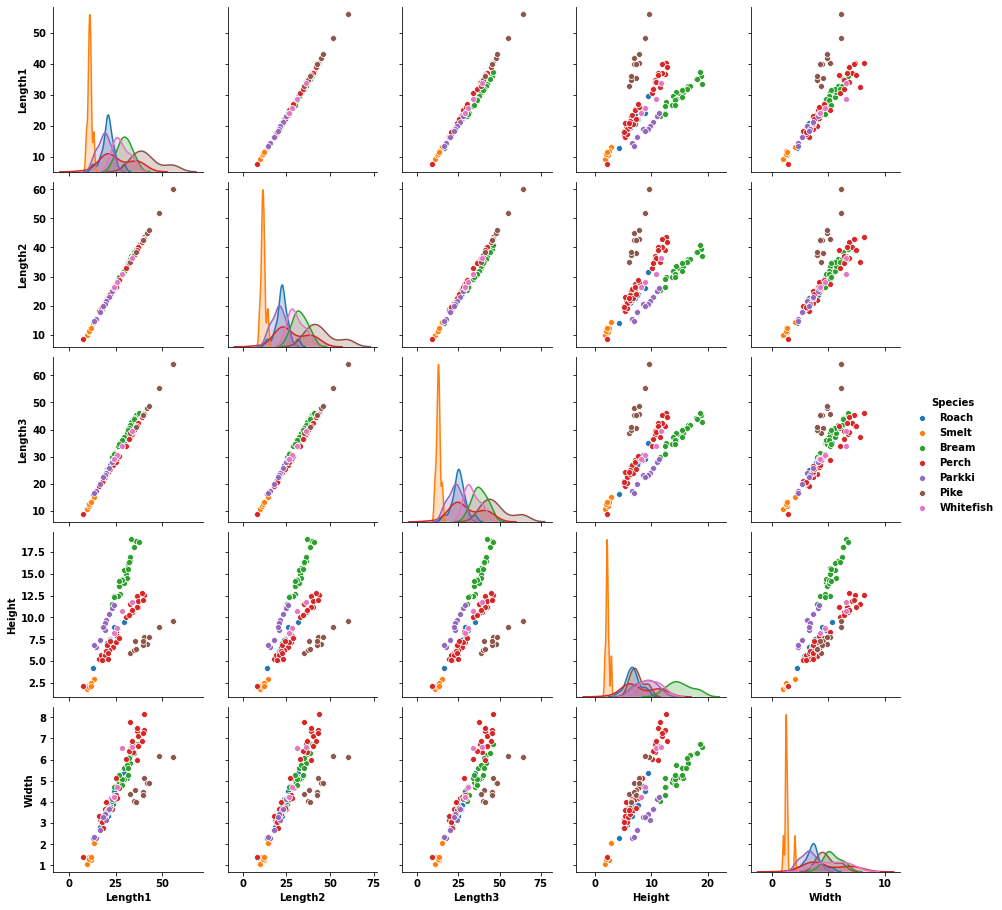

In [12]:
sns.pairplot(X_train2, hue = "Species", kind = "scatter")

When we look at the row for Length2 in the above pairplot, we can see that the scatter plot for the correlation between (Length2, Length1) and (Length2, Length3) display very high correlations with values of nearly 1. The correlation plot between (Length2, Width) is not as high as that of the previous 2 plots, but it is positively correlated with a value greater than 0.8. The correlation plot between (Length2, Height) is not as linear as the previous 3, and so it confirms the previous answer.

### e.

Text(0.5, 1.0, 'Histogram of weight distribution')

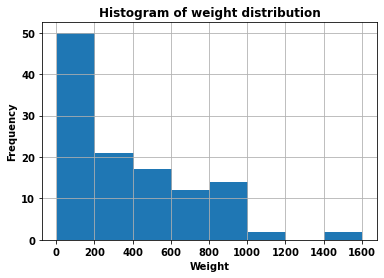

In [13]:
y_train.hist(bins = 8)
xlabel('Weight')
ylabel('Frequency')
title('Histogram of weight distribution')

Text(0.5, 1.0, 'Histogram of log weight distribution')

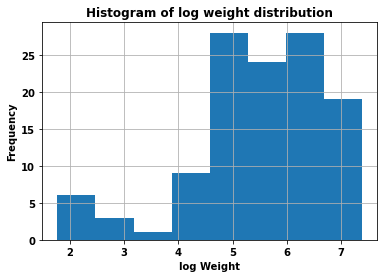

In [14]:
y_train_log = np.log(y_train)
y_train_log.hist(bins = 8)
xlabel('log Weight')
ylabel('Frequency')
title('Histogram of log weight distribution')

In [15]:
y_test_log = np.log(y_test)
model2 = linear_model.LinearRegression()
semi_log = model2.fit(X_train, y_train_log)

In [16]:
y_train_log_pred = semi_log.predict(X_train)
print("The mean absolute error for the training set is:", mean_absolute_error(y_train, np.exp(y_train_log_pred)))
print("The R2 score for the training set is:", r2_score(y_train, np.exp(y_train_log_pred)))
print("\n")
y_test_log_pred = semi_log.predict(X_test)
print("The mean absolute error for the test set is:", mean_absolute_error(y_test, np.exp(y_test_log_pred)))
print("The R2 score for the test set is:", r2_score(y_test, np.exp(y_test_log_pred)))

The mean absolute error for the training set is: 95.58357335390237
The R2 score for the training set is: 0.6973650153179167


The mean absolute error for the test set is: 177.96160694578717
The R2 score for the test set is: -0.42336576724785413


The MAE for the test set nearly doubled and the R2 score for the test set became negative. This implies that the semilog training algorithm did a poor job at establishing a relationship between X and y on a semi-log scale. In this case, I would prefer to use a linear regression rather than a semi-log regression.

### f.

In [17]:
from sklearn.feature_selection import RFE

In [18]:
model = linear_model.LinearRegression()
rfe = RFE(model, n_features_to_select=1)
fit = rfe.fit(X,y)

In [19]:
fit.ranking_

array([2, 5, 1, 3, 4])

In [20]:
X.columns

Index(['Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

In [21]:
significance = pd.DataFrame(zip(X.columns,fit.ranking_), columns = ['Feature', 'Rank']).sort_values(by = 'Rank', ascending = True).set_index('Feature')
significance

,Rank
Feature,
Length3,1
Length1,2
Height,3
Width,4
Length2,5


### g.

g. (Bonus question - 5 pts) Use the Species column for one-hot encoding and perform part c of this question. Explain your results.

In [22]:
df_copy = df.reset_index()
print(df_copy['Species'].value_counts())
df_copy['Species_cat_perch'] = 0.0
df_copy['Species_cat_perch'][df_copy['Species'] =='Perch'] = 1
df_copy['Species_cat_bream'] = 0.0
df_copy['Species_cat_bream'][df_copy['Species'] =='Bream'] = 1
df_copy['Species_cat_roach'] = 0.0
df_copy['Species_cat_roach'][df_copy['Species'] =='Roach'] = 1
df_copy['Species_cat_pike'] = 0.0
df_copy['Species_cat_pike'][df_copy['Species'] =='Pike'] = 1
df_copy['Species_cat_smelt'] = 0.0
df_copy['Species_cat_smelt'][df_copy['Species'] =='Smelt'] = 1
df_copy['Species_cat_parkki'] = 0.0
df_copy['Species_cat_parkki'][df_copy['Species'] =='Parkki'] = 1
df_copy['Species_cat_whitefish'] = 0.0
df_copy['Species_cat_whitefish'][df_copy['Species'] =='Whitefish'] = 1

Perch        56
Bream        35
Roach        19
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64


In [23]:
X_fish_cat = df_copy.drop(['Weight' , 'Species'], axis=1)
y_fish_cat = df['Weight']

In [24]:
X_train_fish_cat, X_test_fish_cat, y_train_fish_cat, y_test_fish_cat = train_test_split(X_fish_cat, y_fish_cat, test_size=0.25, random_state=50)
train_regression = reg.fit(X_train_fish_cat, y_train_fish_cat)
y_pred_train_fish = reg.predict(X_train_fish_cat)
y_pred_test_fish = reg.predict(X_test_fish_cat)
print("The MAE for the training set with the fish categorical variables is:", mean_absolute_error(y_train_fish_cat, y_pred_train_fish))
print("The R2 score for the training set with the fish categorical variables is:", r2_score(y_train_fish_cat, y_pred_train_fish))
print("\n")
print("The MAE for the test set with the fish categorical variables is:", mean_absolute_error(y_test_fish_cat, y_pred_test_fish))
print("The R2 score for the test set with the fish categorical variables is:", r2_score(y_test_fish_cat, y_pred_test_fish))

The MAE for the training set with the fish categorical variables is: 63.15937130081529
The R2 score for the training set with the fish categorical variables is: 0.9292624473278825


The MAE for the test set with the fish categorical variables is: 72.60591304329998
The R2 score for the test set with the fish categorical variables is: 0.9444710892480658


# Question 4 (30 pts)

Using the same data from the previous question, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. Use the same train and test data with additional augmented columns from before. Scale the data so that each of the independent variables have zero mean and unit variance. You can use the [sklearn.preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function for this.

    from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MAE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

5) Why did we have to scale the data before regularization? (5pts)

## Answer

### 1.

In [25]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold, GridSearchCV

In [26]:
X_train_norm = scale(X_train, axis=0, with_mean=True, with_std=True, copy=True)
X_test_norm = scale(X_test, axis=0, with_mean=True, with_std=True, copy=True)

alphas = 10**np.linspace(10,-2,100)*0.5
n_folds = 5
tuned_parameters = [{'alpha': alphas}]

# Lasso Model
lasso = Lasso(random_state = 0, tol = 0.1)
lasso_clf = GridSearchCV(lasso, tuned_parameters, scoring='neg_mean_absolute_error', cv=n_folds, refit=False)
lasso_clf.fit(X_train_norm,y_train)
print("The best lambda based on cross validation for lasso regression is:",lasso_clf.best_params_['alpha'])

# Ridge Model
ridge = Ridge(random_state = 0, tol = 0.1)
ridge_clf = GridSearchCV(ridge, tuned_parameters, scoring='neg_mean_absolute_error', cv=n_folds, refit=False)
ridge_clf.fit(X_train_norm,y_train)
print("The best lambda based on cross validation for ridge regression is:",ridge_clf.best_params_['alpha'])

The best lambda based on cross validation for lasso regression is: 5.361336110051605
The best lambda based on cross validation for ridge regression is: 0.06164233697210317


### 2.

Text(0.5, 1.0, 'Lasso coefficient plotting due to alpha')

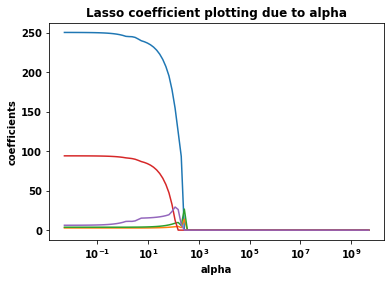

In [27]:
# Lasso coefficient plotting

lasso_coefs = []
lasso_model = linear_model.Lasso(alpha = alphas, random_state = 0, tol = 0.1)
for a in alphas:
    lasso_model.set_params(alpha=a)
    lasso_model.fit(X_train_norm, y_train)
    lasso_coefs.append(lasso_model.coef_)
    
ax = plt.gca()
ax.plot(alphas, lasso_coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Lasso coefficient plotting due to alpha')

Text(0.5, 1.0, 'Ridge coefficient plotting due to alpha')

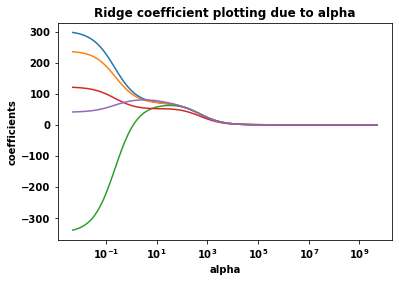

In [28]:
# Ridge coefficient plotting

ridge_coefs = []
ridge_model = linear_model.Ridge(alpha = alphas, random_state = 0, tol = 0.1)
for a in alphas:
    ridge_model.set_params(alpha=a)
    ridge_model.fit(X_train_norm, y_train)
    ridge_coefs.append(ridge_model.coef_)
    
ax = plt.gca()
ax.plot(alphas, ridge_coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Ridge coefficient plotting due to alpha')

As the regularization parameter increases, the coefficients are penalized and approach 0.

### 3.

In [29]:
model = linear_model.LinearRegression()
linear = model.fit(X_train_norm, y_train)
y_pred_test_linear = linear.predict(X_test_norm)

In [30]:
model2 = linear_model.Ridge(alpha = ridge_clf.best_params_['alpha'], random_state = 0, tol = 0.1)
ridge_best = model2.fit(X_train_norm, y_train)
y_pred_test_ridge = ridge_best.predict(X_test_norm)

In [31]:
model3 = linear_model.Lasso(alpha = lasso_clf.best_params_['alpha'], random_state = 0, tol = 0.1)
lasso_best = model3.fit(X_train_norm, y_train)
y_pred_test_lasso = lasso_best.predict(X_test_norm)

In [32]:
print("The linear MAE on the test data is:", mean_absolute_error(y_test, y_pred_test_linear))
print("The ridge MAE on the test data is:", mean_absolute_error(y_test, y_pred_test_ridge))
print("The lasso MAE on the test data is:", mean_absolute_error(y_test, y_pred_test_lasso))

The linear MAE on the test data is: 103.37374547993404
The ridge MAE on the test data is: 104.08272979280555
The lasso MAE on the test data is: 102.72722937993879


### 4.

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

In [33]:
lassoCV = LassoCV(alphas = None, cv = 10, max_iter = 10000)
lassoCV.fit(X_train_norm, y_train)
print("The best alpha value based on cross validation for the lasso regression is:", lassoCV.alpha_)

The best alpha value based on cross validation for the lasso regression is: 0.7609265050141201


In [34]:
model4 = linear_model.Lasso(alpha = lassoCV.alpha_)
lassoCV_best = model4.fit(X_train_norm, y_train)
lassoCV_coefficients = pd.DataFrame(zip(X_train.columns,lassoCV_best.coef_), columns = ['Feature', 'Lasso CV Coefficient']).set_index('Feature')
lassoCV_coefficients

,Lasso CV Coefficient
Feature,
Length1,198.301015
Length2,1.490494
Length3,-0.000000
Height,62.837349
Width,77.754620


### 5.

5) Why did we have to scale the data before regularization? (5pts)

Scaling allows the parameters that have large scales (such as height or other parameters with large unit changes) to have their effect measured on the same scale as the other parameters. For lasso and ridge, these unequal scales will have disproprtionate penalties for those parameters.

# Question 5 (5 pts)

Lasso and ridge regularization techniques are often used to combat overfitting during linear regression. Which of the two yields more sparse models (i.e. fewer number of parameters) when the tuning parameter $\lambda$ is sufficiently large (but not infinite)?

## Answer

Lasso penalizes the parameters more heavily because of the shape of the penalization term. Since it is a square region, as opposed to Ridge's circular penalization area, when $\lambda$ gets larger it forces some parameters' RSS (residual sum of squares) to intercept the penalization region at the extrema which of course is centered on zero.  When this happens, lasso forces those parameters to be equal to zero thus yielding a more sparse model.